In [19]:
import pandas as pd
import scipy
import scipy.io as spio
import numpy as np
import scanpy as sc
import mudata as md
import seaborn as sns
#File Location

file_loc = "../Hao2021/Data/GSE164378_RAW/"

In [8]:
# ADT Matrix
ADT_matrix = scipy.io.mmread(file_loc+"GSM5008738_ADT_3P-matrix.mtx.gz")
ADT_matrix = ADT_matrix.tocsr()

# ADT_barcodes
ADT_barcodes = pd.read_csv(file_loc+"GSM5008738_ADT_3P-barcodes.tsv.gz",
                          sep = '\t', header = None, index_col=0,
                          names = ["barcode"])

# ADT features
ADT_features = pd.read_csv(file_loc+"GSM5008738_ADT_3P-features.tsv.gz",
                           sep = '\t', header = None, usecols=[0],
                           index_col = 0, names=["ProteinID"])

In [9]:
adata_ADT = sc.AnnData(X=ADT_matrix.T, obs=ADT_barcodes, var=ADT_features,
                  dtype='float32')

In [10]:
adata_ADT

AnnData object with n_obs × n_vars = 161764 × 228

In [ ]:
adata_ADT

In [ ]:
mdata = mu.r

In [11]:
sc.pp.calculate_qc_metrics(adata_ADT, inplace=True, percent_top=None)

In [12]:
mdata = md.read("../Hao2021/Data/Hao2021_3P.h5mu")

In [13]:
mdata

MuData object with n_obs × n_vars = 161764 × 33790
  3 modalities
    RNA:	161764 x 33538
    ADT:	161764 x 228
    HTO:	161764 x 24

In [14]:
sc.pp.calculate_qc_metrics(mdata["ADT"], inplace=True, percent_top=None)

In [15]:
mdata

MuData object with n_obs × n_vars = 161764 × 33790
  3 modalities
    RNA:	161764 x 33538
    ADT:	161764 x 228
      obs:	'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
      var:	'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    HTO:	161764 x 24

In [16]:
sc.pp.calculate_qc_metrics(mdata["RNA"], inplace=True, percent_top=None)

In [17]:
mdata

MuData object with n_obs × n_vars = 161764 × 33790
  3 modalities
    RNA:	161764 x 33538
      obs:	'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
      var:	'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    ADT:	161764 x 228
      obs:	'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
      var:	'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    HTO:	161764 x 24

## Looking at n_genes_by_counts
Distribution of ADTs/RNAs per cell over all samples.
y-axis = the amount of cells
x_axis = the amount of RNA/ADT present in a certain amount of cells

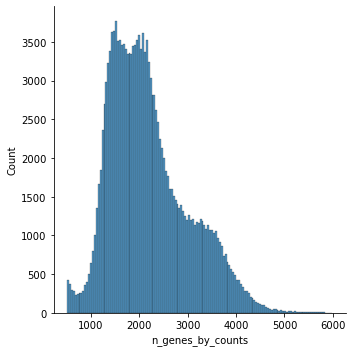

In [21]:
sns.displot(mdata["RNA"].obs.n_genes_by_counts)

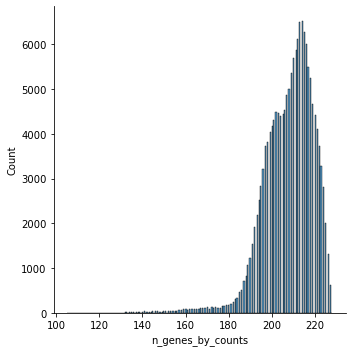

In [25]:
sns.displot(mdata["ADT"].obs.n_genes_by_counts, linewidth=0.4)

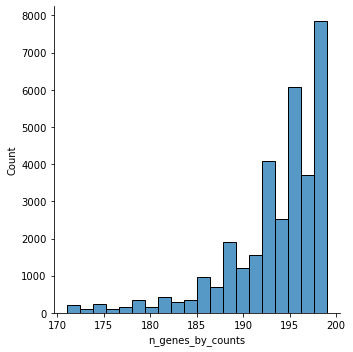

In [47]:
sns.displot(
            mdata["ADT"][(mdata["ADT"].obs.n_genes_by_counts < 200) & 
                        (mdata["ADT"].obs.n_genes_by_counts > 170)].obs.n_genes_by_counts,
            bins=20
            )


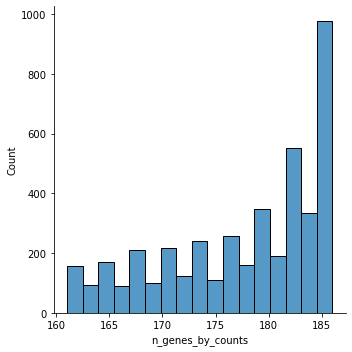

In [32]:
sns.displot(
    mdata["ADT"][(mdata["ADT"].obs.n_genes_by_counts < 187) & 
                 (mdata["ADT"].obs.n_genes_by_counts > 160)].obs.n_genes_by_counts
)


There is a drop off 